# **7.6 Regresiones Lineal(Polinómica) y Logística:**

Algoritmo de clasificación y regresión

In [1]:
import sklearn
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

## **A - Lineal y Polinómica:**

<font size = 5> 

La regresión lineal es un método clásico que se basa en minimizar la diferencia de los cuadrados de las cifras predichas vs las reales. En la realidad, la regresión linear es muy simple de lograr pero al mismo tiempo no se presenta tan habitualmente como querríamos. Es por eso que podemos extender la dimensión de las relaciones que buscamos a otros grados polinomicos.

<font size = 5> 

Su aplicación en SKLEARN es sencilla, usamos *'sklearn.linear_model.LinearRegression()'*



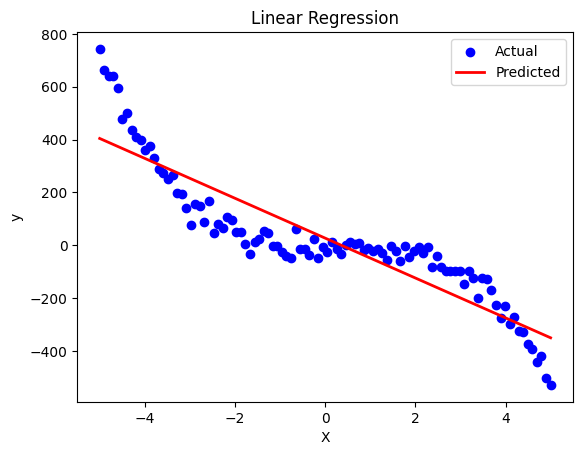

Mean Squared Error (MSE): 11365.589130391087
R-squared (R^2) Score: 0.8096059416860703


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

# Datos de ejemplo
np.random.seed(0)
X = np.linspace(-5, 5, 100).reshape(-1, 1)
y = 2 * X + 3 * X**2 - 5 * X**3 + np.random.normal(0, 30, size=(100, 1))

model = LinearRegression()
model.fit(X, y)

# Prediccion
y_pred = model.predict(X)

# Métricas
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Visualización
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()

print("Mean Squared Error (MSE):", mse)
print("R-squared (R^2) Score:", r2)


Para aplicar características polinómicas lo unico que hay que hacer es transformar los valores de input usando **'sklearn.preprocessing.PolynomialFeatures()'**

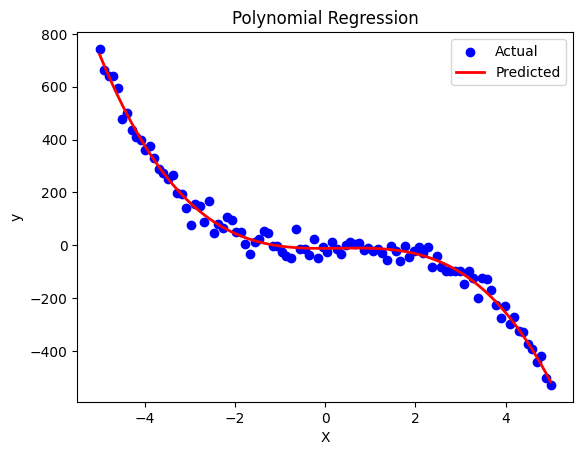

Mean Squared Error (MSE): 767.7497631763227
R-squared (R^2) Score: 0.987138810711551


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Caracteristicas polinomicas
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Fit
model = LinearRegression()
model.fit(X_poly, y)

y_pred = model.predict(X_poly)
# Visualizacion
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R^2) Score:", r2)


## **B - Logística:**

<font size = 5> 

La regresión logística utiliza la **función sigmoide** para estimar la relación entre las variables independientes y la variable dependiente. Solo sirve para problemas de clasificación binaria (0-1) y nos da la probabilidad de que estemos en alguno de esos dos valores.

<center><img src="./imgs/sigmoid.png">

In [18]:
import numpy as np
from sklearn.model_selection import train_test_split

# Datos de Ejemplo
np.random.seed(0)
X1 = np.random.normal(loc=0, scale=1, size=(100, 2))
X2 = np.random.normal(loc=3, scale=1, size=(100, 2))
X = np.vstack((X1, X2))
y = np.hstack((np.zeros(100), np.ones(100)))

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [19]:
from sklearn.linear_model import LogisticRegression

# Modelo
model = LogisticRegression()

# Fit
model.fit(X_train, y_train)


LogisticRegression()

In [20]:
from sklearn.metrics import accuracy_score, classification_report

# Predicciones
y_pred = model.predict(X_test)

# Precisión
accuracy = accuracy_score(y_test, y_pred)

# Manera general de conseguir varias métricas:
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        21
         1.0       1.00      1.00      1.00        19

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

